#Import the right libraries

In [4]:
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import hopsworks
import pandas as pd

/home/redve/Kurser Master/ID2223 Scalable Machine Learning and Deep Learning/ID2223/Lab1/Task2/venv/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
project = hopsworks.login()
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/190613
Connected. Call `.close()` to terminate connection gracefully.


In [7]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/wine.csv')
wine_df 


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Transform column names into valid names   

In [8]:
wine_df.columns = wine_df.columns.str.replace(' ', '_')
wine_df.columns = wine_df.columns.str.lower()
wine_df

wine_df
wine_df.fillna(0, inplace=True)
y_wine = wine_df['quality']
X_wine = wine_df.drop(['quality'], axis=1)



2023-11-15 13:42:34,837 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-11-15 13:42:34,856 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



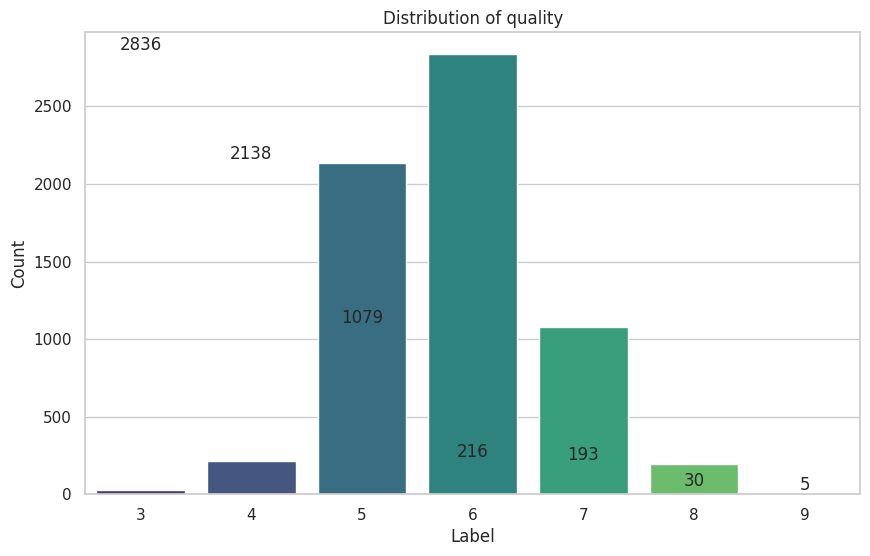

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'label_column' is the column you want to visualize
label_column = 'quality'
sns.set(style="whitegrid")  # Set the style for seaborn

# Count the occurrences of each unique value in the label column
label_counts = wine_df['quality'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of ' + label_column)




# Show the plot
plt.show()

In [136]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#I only want to encode the first column
X_wine['type'] = label_encoder.fit_transform(X_wine['type'])

X_wine.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   ph                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [137]:
# from sklearn.preprocessing import StandardScaler , MinMaxScaler

# # Create a StandardScaler object
# #normalize the data



# scaler = StandardScaler()

# # Standardize the data
# X_wine_standard = scaler.fit_transform(X_wine)


# X_wine_standard = pd.DataFrame(X_wine_standard, columns=X_wine.columns)

# X_wine_standard.head(6400)

# Wine_standard = X_wine_standard 
# #I want to add y_wine to the last column of X_wine_standard
# Wine_standard['quality'] = y_wine
# Wine_standard

In [138]:
# from sklearn.decomposition import PCA
# import numpy as np
# n = 10
# pca = PCA(n_components=n) # doing pca and keeping only n_components
# pca = pca.fit(X_wine_standard) # the correct dimension of X for sklearn is P*N (samples*features)
# X_pca_skl = pca.transform(X_wine_standard)
# #X2 = pca.inverse_transform(X_pca_skl)
# import matplotlib.pyplot as plt
# plt.bar(range(0,n), pca.explained_variance_ratio_, label="individual var");
# plt.step(range(0,n), np.cumsum(pca.explained_variance_ratio_),'r', label="cumulative var");
# plt.xlabel('Principal component index'); plt.ylabel('explained variance ratio %');
# plt.legend()
# print(X_pca_skl.shape)
# #print(X1)
# #print(X1-X2)



In [139]:
wine_fg = fs.get_or_create_feature_group(name='winequality'
                                           ,version='4'
                                           ,primary_key=['type','fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','ph','sulphates','alcohol']
                                            ,description='wine quality')
wine_fg.insert(Wine_standard)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/190613/fs/190532/fg/220539


Uploading Dataframe: 100.00% |██████████| Rows 6497/6497 | Elapsed Time: 00:07 | Remaining Time: 00:00


Launching job: winequality_4_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/190613/jobs/named/winequality_4_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7ff6eab50520>, None)